# Аналитика в авиакомпании <a class="tocSkip">

Нашей задачей является анализ предпочтений пользователей, покупающих билеты российской авиакомпании  «F9», выполняющей внутренние пассажирские авиаперевозки.
На предыдущих этапах проекта мы  изучили базу данных и проанализировали спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали. 

В результате запросов к БД мы получили следующую информацию в виде двух таблиц:

1. * model — модели самолета
  * flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года



2. * city — города
  * average_flights — среднее количестве рейсов, прибывающих в город city за день в августе 2018 года

**Описание данных**

База данных об авиаперевозках:
Таблица airports — информация об аэропортах:

    airport_code — трёхбуквенный код аэропорта
    airport_name — название аэропорта
    city — город
    timezone — временная зона

Таблица aircrafts — информация об самолётах:

    aircraft_code — код модели самолёта
    model — модель самолёта
    range — количество самолётов

Таблица tickets — информация о билетах:

    ticket_no — уникальный номер билета
    passenger_id — персональный идентификатор пассажира
    passenger_name — имя и фамилия пассажира

Таблица flights — информация о рейсах:

    flight_id — уникальный идентификатор рейса
    departure_airport — аэропорт вылета
    departure_time — дата и время вылета
    arrival_airport — аэропорт прилёта
    arrival_time — дата и время прилёта
    aircraft_code – id самолёта

Таблица ticket_flights — стыковая таблица «рейсы-билеты»

    ticket_no — номер билета
    flight_id — идентификатор рейса

Таблица festivals — информация о фестивалях

    festival_id — уникальный номер фестиваля
    festival_date — дата проведения фестиваля
    festival_city — город проведения фестиваля
    festival_name — название фестиваля

## Шаг 4. Аналитика средствами Python

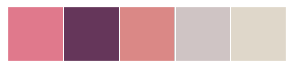

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)


import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
colors_nude = ['#e0798c','#65365a','#da8886','#cfc4c4','#dfd7ca']
sns.palplot(sns.color_palette(colors_nude))


In [49]:
from IPython.display import display, HTML

css = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(css))

Выгрузим таблицы из запросов для того чтобы ознакомиться с данными. 

In [4]:
table1 = pd.read_csv('/datasets/query_1.csv')

In [5]:
display(table1)
display(table1.describe())

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


Из таблицы видим сколько рейсов осуществил каждый вид самолетов. Наименьшее количество рейсов совершил Boeing 777-300 - 300 рейсов, наибольшее Cessna 208 Caravan - 4557 рейсов. 

In [6]:
table2 = pd.read_csv('/datasets/query_3.csv')

In [7]:
display(table2.sample(7))
display(table2.describe())

,city,average_flights
42,Мирный,6.290323
87,Усть-Илимск,2.870968
19,Грозный,1.129032
31,Комсомольск-на-Амуре,1.000000
83,Улан-Удэ,1.608696
25,Казань,7.741935
0,Абакан,3.870968


,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


Из выгруженной таблицы видим, что наименьшее среднее количество рейсов составляет 1 рейс, а наибольшее количество рейсов - 129.77 рейсов.

Выгрузим города, для которых в августе 2018 за день был совершен в среднем 1 рейс.

In [8]:
table2[table2['average_flights']==1]

,city,average_flights
1,Анадырь,1.0
8,Благовещенск,1.0
9,Братск,1.0
21,Иваново,1.0
22,Ижевск,1.0
31,Комсомольск-на-Амуре,1.0
49,Нефтеюганск,1.0
58,Нягань,1.0
65,Петропавловск-Камчатский,1.0
76,Стрежевой,1.0


In [9]:
table2[table2['average_flights']>129]

,city,average_flights
43,Москва,129.774194


Лидером по среднему количеству совершенных за день рейсов в августе месяце стал город Москва - 129,77 рейсов.

In [10]:
display(table1.info())
display(table2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

Типы данных в первой таблице нас удовлетворяют. Во второй таблице среднее количество рейсов логичнее перевести в целочисленный тип.


In [11]:
table2['average_flights'] = table2['average_flights'].astype('int')

**Топ-10 городов по количеству рейсов**

Выведим ТОП-10 городов по количеству рейсов.

In [23]:
top10 = table2.sort_values(by='average_flights', ascending = False).head(10)
display(top10)

,city,average_flights
43,Москва,129
70,Санкт-Петербург,31
54,Новосибирск,17
20,Екатеринбург,11
33,Красноярск,11
63,Пермь,10
67,Ростов-на-Дону,10
10,Брянск,10
84,Ульяновск,9
73,Советский,9


Видим, что у нас лидируют 3 города по количеству рейсов: Москва (129 рейсов), Санкт-Петербург(31 рейс) и Новосибирск (17 рейсов).

### Модели самолетов и количество рейсов

In [13]:
tablemodel = table1.sort_values(by='flights_amount', ascending=False)

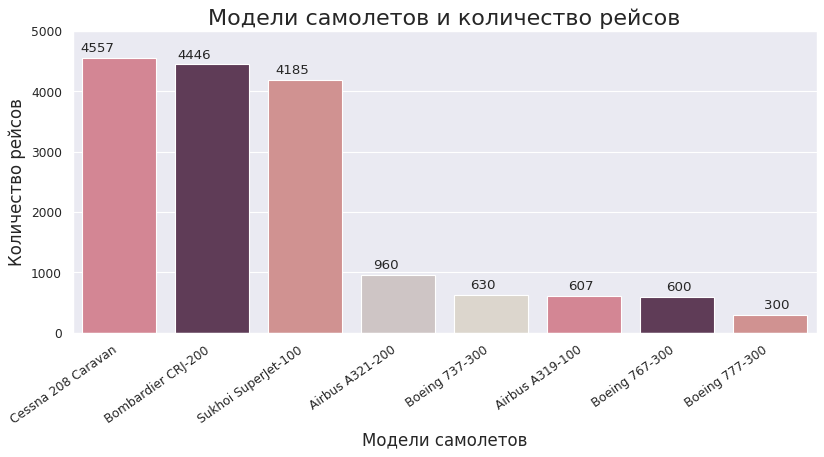

In [14]:
plt.figure(figsize=(12,5), dpi=80)
plt.title('Модели самолетов и количество рейсов', size=20)
ax = sns.barplot(x=tablemodel['model'], y=tablemodel['flights_amount'], palette = colors_nude)
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right")
for p in ax.patches:
        ax.annotate(str(round(p.get_height())), (p.get_x() * 1.05, p.get_height() + 100))
plt.xlabel('Модели самолетов', size=15)
plt.ylabel('Количество рейсов', size=15)
plt.ylim(None, 5000)
plt.show()

Из графика видим, что наиболее популярными моделями самолетов у компании F9 являются: 
* Cessna 208 Caravan - 4557 рейсов
* Bombardier CRJ-200 - 4446 рейсов
* Sukhoi Superjet-100 - 4185 рейсов


Это узкофюзеляжные ближнемагистральные воздушные судна, рассчитанные на региональные перевозки. По стоимости воздушных судов они уступают Боингам и Эирбасам, поэтому возможно парк самолетов состоит в основном из них. Также в один самолет узкого фюзеляжа вмещается меньшее количество людей, возможно они поэтому чаще осуществляют рейсы. Boeing-777-300 стоит вообще на последнем месте по количеству рейсов, поскольку является широкофюзеляжным дальнемагистральным воздушным судном, а как мы заметили, компания осуществляет в основном региональные перевозки между близлежащими городами, поэтому, все логично. 

### Города и количество рейсов

In [15]:
tablecity = table2.sort_values(by='average_flights', ascending = False)

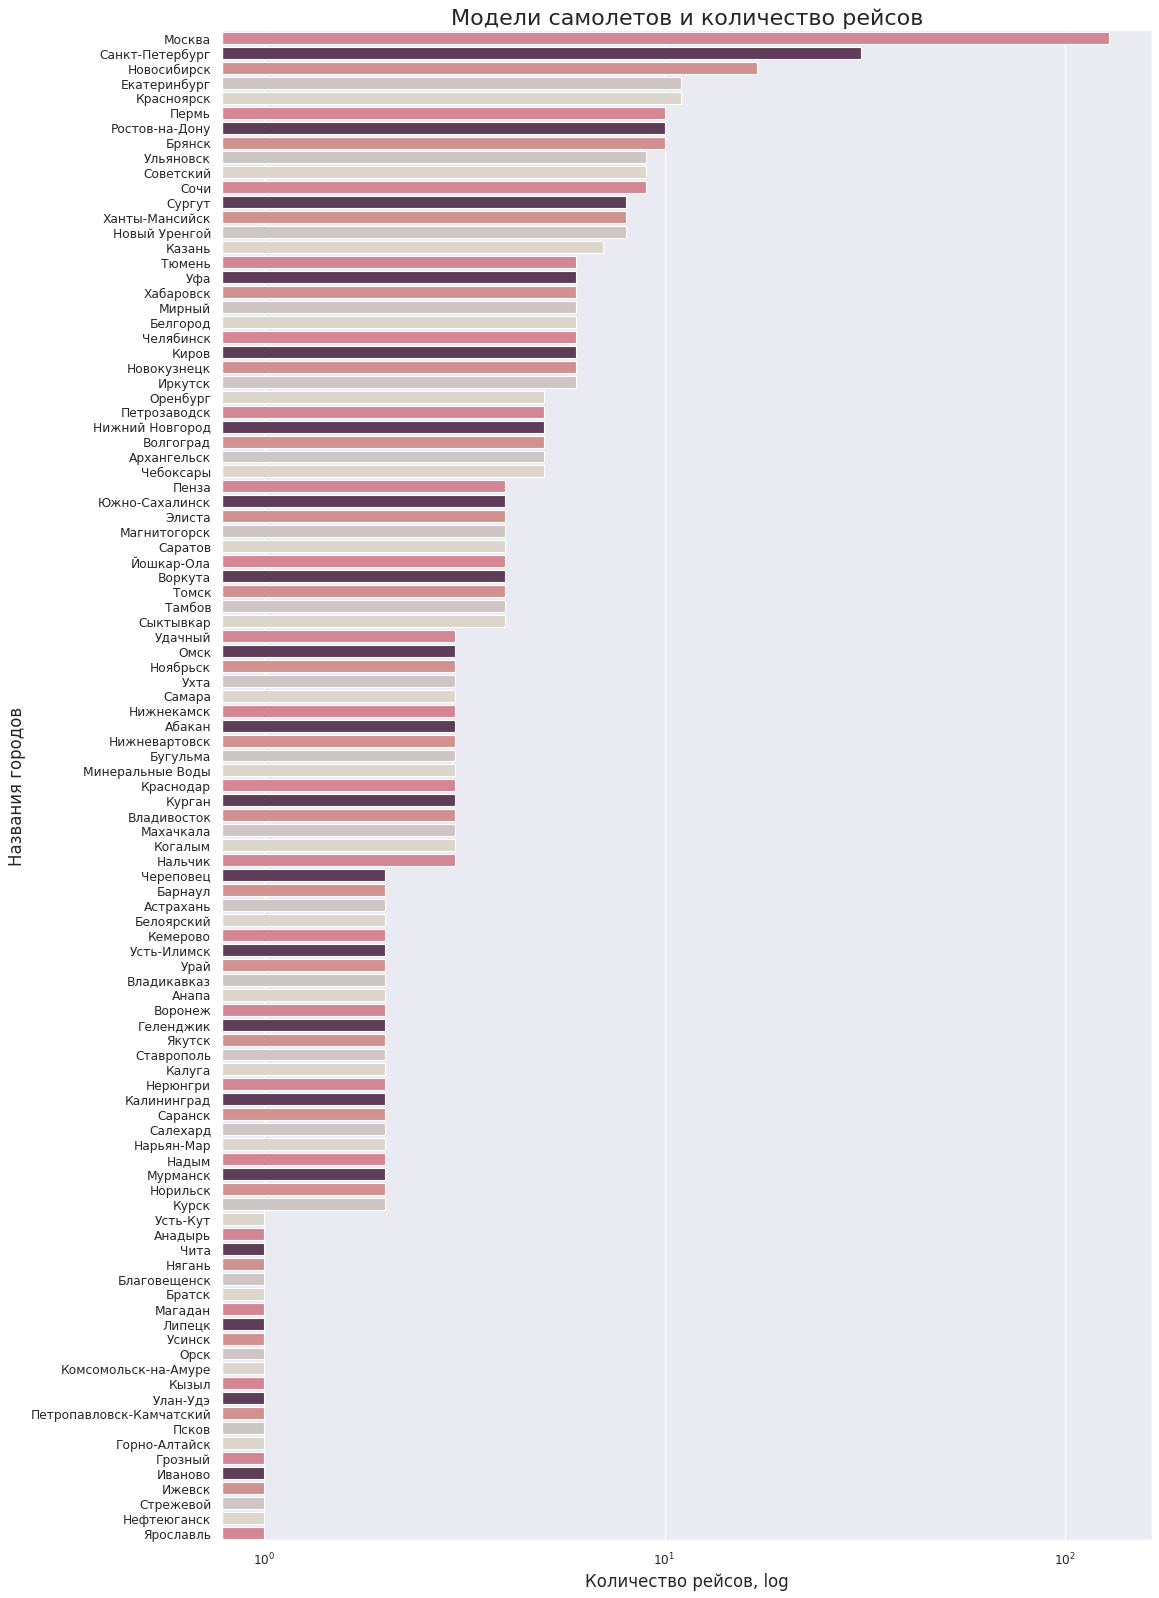

In [51]:
plt.figure(figsize=(15,25), dpi=80)
plt.title('Модели самолетов и количество рейсов', size=20)
ax = sns.barplot(x=tablecity['average_flights'], y=tablecity['city'], palette = colors_nude)
plt.xlabel('Количество рейсов, log', size=15)
plt.ylabel('Названия городов', size=15)
ax.set(xscale="log")
plt.show()

Для того чтобы получить более наглядный результат на графике, использовалась логарифмическая шкала. В целом, по графику видим, что 3 города сильно выбиваются по количеству рейсов: Москва (129), Санкт-Петербург(31) и Новосибирск(17). По графику мы также видим, что у авиакомпании сформированы определенные группы городов с одинаковым количеством рейсов.
Также можно сказать, что рейсы авиакомпании рассчитаны на перемещения на небольшие расстояния между городами, поскольку авиакомпанией из всего парка воздушных судов больше всего эксплуатируются узкофюзеляжные ближнемагистральные самолеты.

### Топ-10 городов и количество рейсов

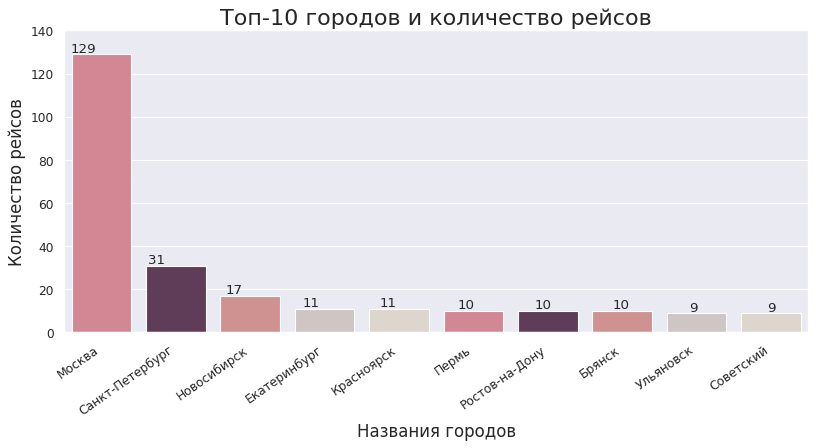

In [52]:
plt.figure(figsize=(12,5), dpi=80)
plt.title('Топ-10 городов и количество рейсов', size=20)
ax = sns.barplot(x=top10['city'], y=top10['average_flights'], palette = colors_nude)
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right")
for p in ax.patches:
        ax.annotate(str(round(p.get_height())), (p.get_x() * 1.04, p.get_height() + 1.04))
plt.xlabel('Названия городов', size=15)
plt.ylabel('Количество рейсов', size=15)
plt.ylim(None, 140)
plt.show()

По графику видим, что Москва резко выбивается из всех городов по среднему количеству рейсов в день, например, от того же Санкт-Петербурга почти в 4 раза. Санкт-Петербург и Новосибирск  - в среднем по 31 и 17 рейса в день. Остальных лидеров можно разделить еще на три группы:
* Екатеринбург и Красноярск - по 11 рейсов в день
* Пермь, Ростов-на-Дону, Брянск - по 10 рейсов в день
* Ульяновск и Советский - примерно по 9 рейсов в день

## Выводы

- Наименьшее количество рейсов совершил Boeing 777-300 - 300 рейсов, наибольшее Cessna 208 Caravan - 4557 рейсов.
- Наименьшее среднее количество рейсов составляет 1 рейс, а наибольшее количество рейсов - 129.77 рейсов.
- Лидируют 3 города по количеству рейсов: Москва (129 рейсов), Санкт-Петербург(31 рейс) и Новосибирск (17 рейсов).


Наиболее популярными моделями самолетов у компании F9 являются:

* Cessna 208 Caravan - 4557 рейсов
* Bombardier CRJ-200 - 4446 рейсов
* Sukhoi Superjet-100 - 4185 рейсов

Это узкофюзеляжные ближнемагистральные воздушные судна, рассчитанные на региональные перевозки. По стоимости воздушных судов они уступают Боингам и Эирбасам, поэтому возможно парк самолетов состоит в основном из них. Также в один самолет узкого фюзеляжа вмещается меньшее количество людей, возможно они поэтому чаще осуществляют рейсы. Boeing-777-300 стоит вообще на последнем месте по количеству рейсов, поскольку является широкофюзеляжным дальнемагистральным воздушным судном, а как мы заметили, компания осуществляет в основном региональные перевозки между близлежащими городами, поэтому, все логично.

* 3 города сильно выбиваются по количеству рейсов: Москва (129), Санкт-Петербург(31) и Новосибирск(17). У авиакомпании сформированы определенные группы городов с одинаковым количеством рейсов. Также можно сказать, что рейсы авиакомпании рассчитаны на перемещения на небольшие расстояния между городами, поскольку авиакомпанией из всего парка воздушных судов больше всего эксплуатируются узкофюзеляжные ближнемагистральные самолеты.

Москва резко выбивается из всех городов по среднему количеству рейсов в день, например, от того же Санкт-Петербурга почти в 4 раза. Санкт-Петербург и Новосибирск - в среднем по 31 и 17 рейса в день. Остальных лидеров можно разделить еще на три группы:

* Екатеринбург и Красноярск - по 11 рейсов в день
* Пермь, Ростов-на-Дону, Брянск - по 10 рейсов в день
* Ульяновск и Советский - примерно по 9 рейсов в день
